In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [6]:
# Create sample monthly sales data (2 years of data)
dates = pd.date_range('2023-01-01', periods=24, freq='ME')
sales = [
    # 2023 monthly sales
    42, 45, 51, 55, 61, 70, 75, 73, 65, 57, 48, 55,
    # 2024 monthly sales (with an overall increasing trend)
    48, 51, 57, 63, 71, 80, 85, 83, 72, 63, 54, 60
]

sales_ts = pd.Series(sales, index=dates)

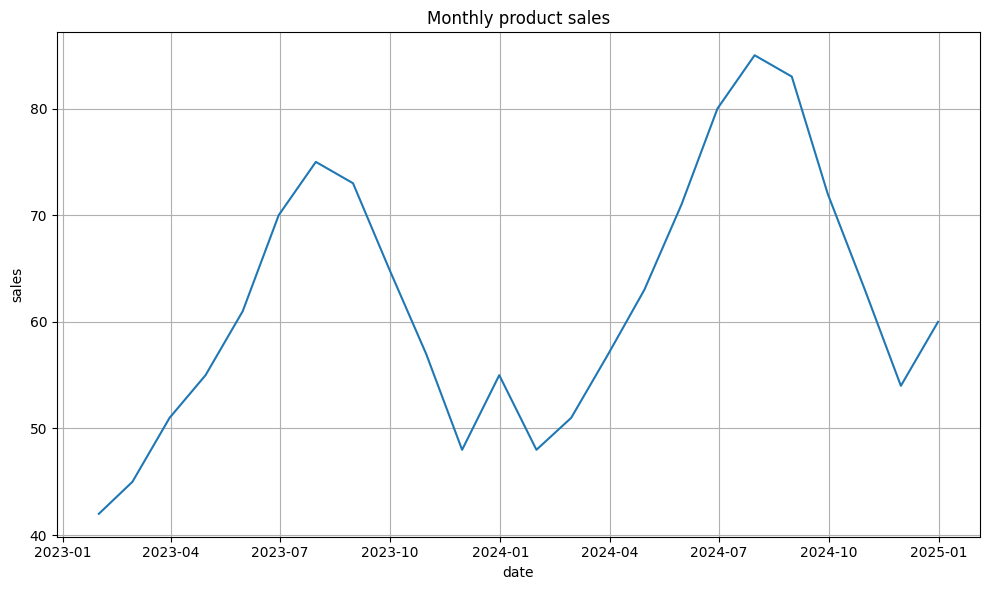

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(sales_ts)
plt.title('Monthly product sales')
plt.xlabel('date')
plt.ylabel('sales')
plt.grid(True)
plt.tight_layout()
plt.show()

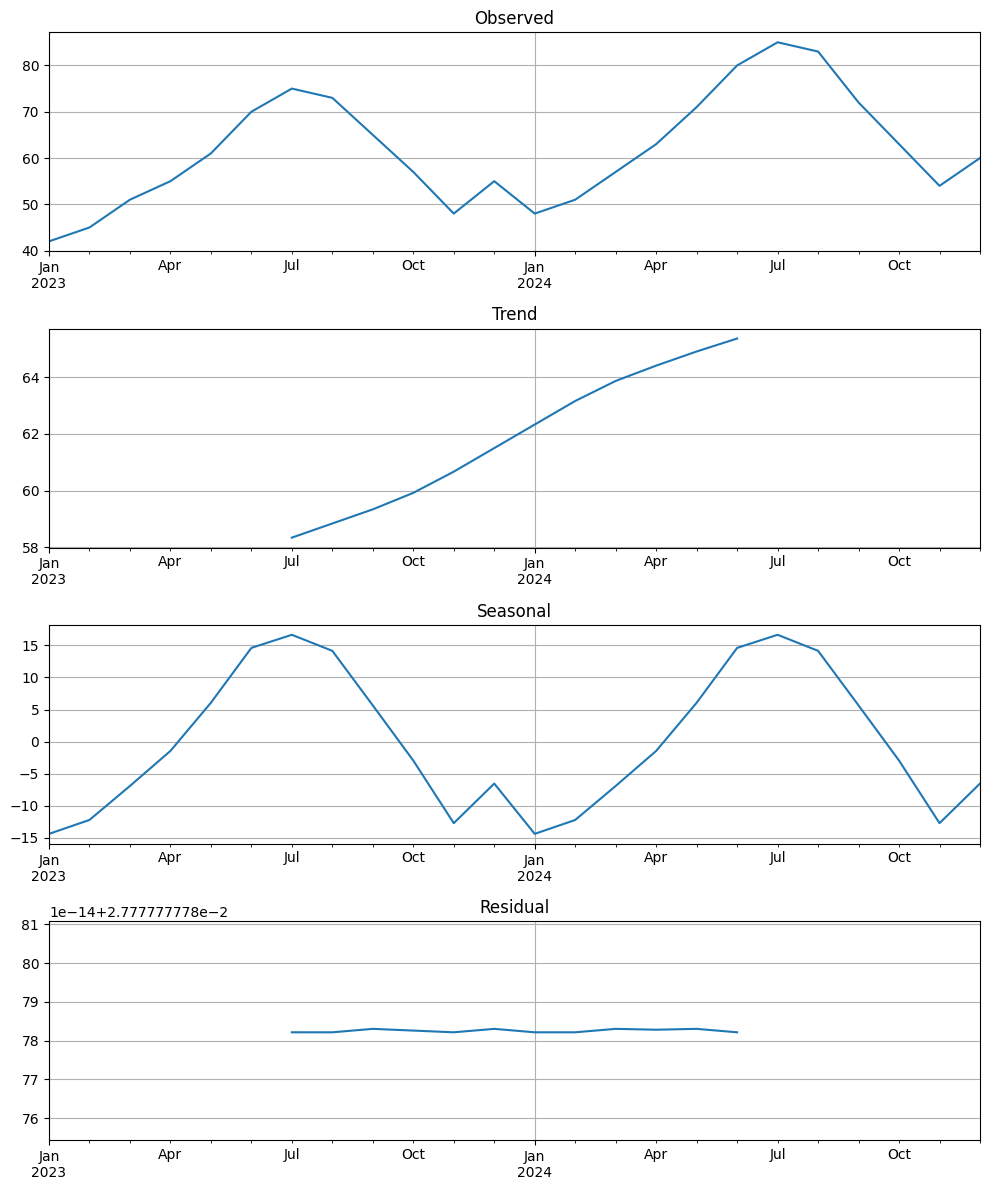

In [8]:
decomposition = seasonal_decompose(sales_ts, model='additive', period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(10,12))

decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
ax1.grid(True)

decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
ax2.grid(True)

decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
ax3.grid(True)

decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
ax4.grid(True)

plt.tight_layout()
plt.show()

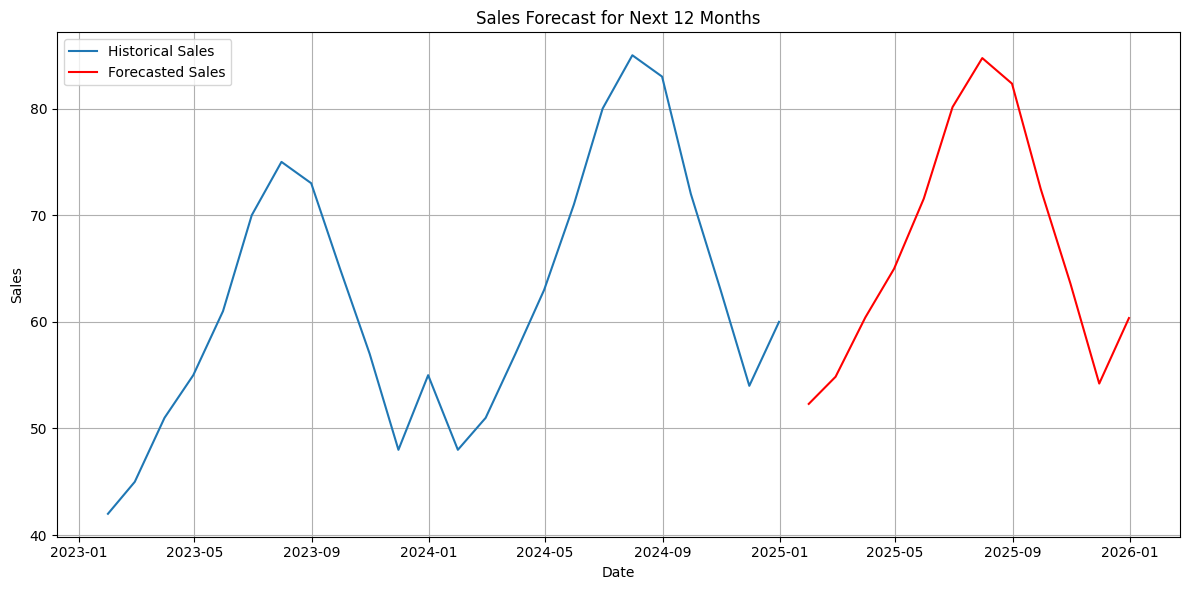

In [9]:
# Create a simple forecast using Holt-Winters Exponential Smoothing
# This handles both trend and seasonality
model = ExponentialSmoothing(
    sales_ts,
    trend='add',            # Additive trend
    seasonal='add',         # Additive seasonality
    seasonal_periods=12     # Monthly data has 12 periods per cycle
)

# Fit the model
model_fit = model.fit()

# Forecast next 12 months
forecast_horizon = 12
forecast = model_fit.forecast(forecast_horizon)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(sales_ts, label='Historical Sales')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# Print the forecasted values
print("Forecasted sales for next 12 months:")
for date, value in zip(forecast.index, forecast.values):
    print(f"{date.strftime('%Y-%m')}: {value:.2f}")

Forecasted sales for next 12 months:
2025-01: 52.30
2025-02: 54.85
2025-03: 60.41
2025-04: 64.98
2025-05: 71.55
2025-06: 80.14
2025-07: 84.74
2025-08: 82.34
2025-09: 72.46
2025-10: 63.58
2025-11: 54.21
2025-12: 60.36
